<a href="https://colab.research.google.com/github/datasciencechampion/Zero-to-Hero-in-NLP-LLM-GenAI-AGI/blob/main/Prompt%20Engineering/Prompt_Engineering_Strategy_Split_Complex_tasks_in_Simpler_subtasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prompt Engineering Strategy: Split Complex tasks in Simpler subtasks**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- Understanding task at hand - "Log file Analysis through Language Model"
- Setup Creation & Helper functions
- Loading and viewing sample log files
- Defining Prompt & Calling Language model(Without task split)
- Spliting Strategy for Complex task
- Defining Prompts for sub-tasks
- Calling Language model with new prompts and logs
- Conclusion

#Understanding Task at Hand

Imagine you're overseeing a system comprised of two applications named App ABC and App XYZ,each interacting with two databases, DB ABC and DB XYZ.
Both applications and databases generate logs that are critical for monitoring system health. These logs contains critical information like error and warning messages along with alarms, kpis and counters.

To ensure that system is healthy we need to analyze these log files with some alarming scenarios in mind.

Analyzing these logs can be a tedious task, which can be streamlined through automation by leveraging a Language Model (LM) with Prompt Engineering.


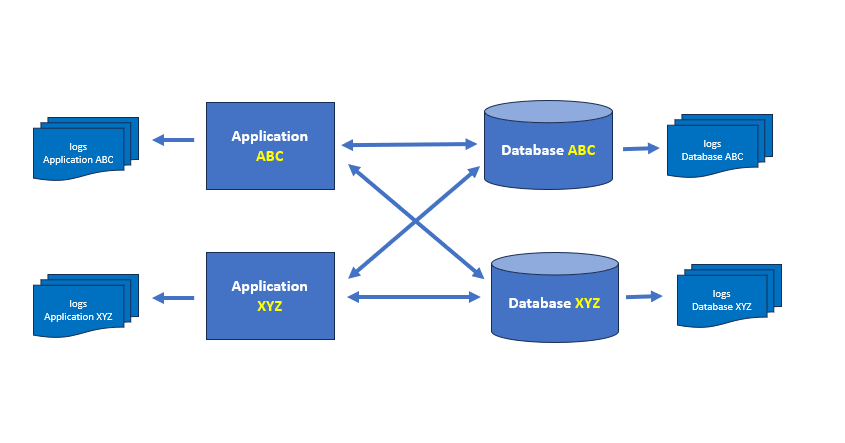

# Create Setup


In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


## Import Libraries

In [2]:
import openai

In [20]:
from google.colab import userdata
my_secret_key = userdata.get('OPENAI_API_KEY')
# Enter your OpenAI API key here:
client = openai.OpenAI(api_key = my_secret_key )

# Helper Function

In [27]:
#Helper function to call ChatCompletion API and get the model response.Here we are going to use "gpt-3.5-turbo" model and we are setting temperature=0
def get_response(messages):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=5000,
        temperature=0.2, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

# Sample log files

In [5]:
log_file_for_application_ABC="""
[2023-03-02 09:30:00] INFO: Application ABC - Initialization started
[2023-03-02 09:30:15] INFO: Application ABC - Connecting to Database ABC
[2023-03-02 09:30:20] ERROR: Application ABC - Connection to Database ABC failed
[2023-03-02 09:30:21] INFO: Application ABC - Connecting to Database XYZ
[2023-03-02 09:30:20] ERROR: Application ABC - Connected to Database XYZ
[2023-03-02 09:31:00] INFO: Application ABC - Retry connecting to Database ABC
[2023-03-02 09:31:05] INFO: Application ABC - Connected to Database ABC
[2023-03-02 09:34:00] INFO: Application ABC - Retrieving data from Database ABC
[2023-03-02 09:35:00] WARNING: Application ABC - Response time from Database ABC is more than 100ms.
[2023-03-02 09:40:00] INFO: Application ABC - Starting data processing
[2023-03-02 09:45:00] ERROR: Application ABC - Data processing failed due to timeout
[2023-03-02 09:50:00] INFO: Application ABC - Data processing completed successfully after retry
[2023-03-02 09:55:00] INFO: Application ABC - Scheduled maintenance starting
[2023-03-02 10:00:00] WARNING: Application ABC - Memory usage exceeds 80%
[2023-03-02 10:05:00] INFO: Application ABC - Maintenance completed successfully
[2023-03-02 10:10:00] ERROR: Application ABC - Unexpected shutdown detected
[2023-03-02 10:15:00] INFO: Application ABC - System restart initiated
[2023-03-02 10:20:00] INFO: Application ABC - System health checks in progress
[2023-03-02 10:25:00] INFO: Application ABC - All services operational
[2023-03-02 10:30:00] WARNING: Application ABC - Detected unauthorized access attempt
[2023-03-02 10:35:00] INFO: Application ABC - Security protocols activated, system secure
[2023-03-02 10:40:00] ERROR: Application ABC - Database XYZ synchronization failed
[2023-03-02 10:45:00] INFO: Application ABC - Attempting to resynchronize Database XYZ
[2023-03-02 10:50:00] INFO: Application ABC - Database XYZ synchronized successfully
[2023-03-02 10:55:00] WARNING: Application ABC - High latency detected in data transmission
[2023-03-02 11:00:00] INFO: Application ABC - Optimizing network parameters
[2023-03-02 11:05:00] INFO: Application ABC - Network parameters optimized, latency reduced
[2023-03-02 11:10:00] ERROR: Application ABC - Data integrity check failed for Dataset 47
[2023-03-02 11:15:00] INFO: Application ABC - Retrying data integrity check for Dataset 47
[2023-03-02 11:20:00] INFO: Application ABC - Data integrity verified for Dataset 47
[2023-03-02 11:25:00] WARNING: Application ABC - Low disk space on server
[2023-03-02 11:30:00] INFO: Application ABC - Cleaning up temporary files to free up disk space
[2023-03-02 11:35:00] INFO: Application ABC - Disk space reclaimed, normal operations resumed
[2023-03-02 11:40:00] ERROR: Application ABC - API response failure from service endpoint
[2023-03-02 11:45:00] INFO: Application ABC - Re-establishing connection to service endpoint
[2023-03-02 11:50:00] INFO: Application ABC - Service endpoint reconnected, API responses normalized
[2023-03-02 11:55:00] WARNING: Application ABC - Outdated software component detected
[2023-03-02 12:00:00] INFO: Application ABC - Initiating software update process
[2023-03-02 12:05:00] INFO: Application ABC - Software update completed successfully, system is up-to-date
[2023-03-02 12:10:00] ERROR: Application ABC - Error in payment gateway integration
[2023-03-02 12:15:00] INFO: Application ABC - Investigating payment gateway issues
[2023-03-02 12:20:00] INFO: Application ABC - Payment gateway issue resolved, transactions proceeding normally
[2023-03-02 12:25:00] WARNING: Application ABC - Spike in user login attempts, monitoring for potential brute force attack
[2023-03-02 12:30:00] INFO: Application ABC - Additional security measures implemented, user account safety ensured
[2023-03-02 12:35:00] INFO: Application ABC - Reviewing access logs for suspicious activity
[2023-03-02 12:40:00] INFO: Application ABC - No breaches detected, system remains secure
[2023-03-02 12:45:00] ERROR: Application ABC - Failure in data synchronization with cloud storage
[2023-03-02 12:50:00] INFO: Application ABC - Retrying data synchronization
[2023-03-02 12:55:00] INFO: Application ABC - Data successfully synchronized with cloud storage
[2023-03-02 13:00:00] INFO: Application ABC - Conducting a detailed performance analysis of recent updates
[2023-03-02 13:05:00] ERROR: Application ABC - Performance degradation detected in module X following updates
[2023-03-02 13:10:00] WARNING: Application ABC - Critical performance threshold reached in processing queue
[2023-03-02 13:15:00] INFO: Application ABC - Adjusting processing queue parameters to optimize throughput
[2023-03-02 13:20:00] INFO: Application ABC - Parameters adjusted, system performance returning to optimal levels
[2023-03-02 13:25:00] INFO: Application ABC - Launching a new feature set for user data handling
[2023-03-02 13:30:00] ERROR: Application ABC - Incompatibility issues found with new user data features
[2023-03-02 13:35:00] INFO: Application ABC - Resolving compatibility issues, rolling back to previous stable version
[2023-03-02 13:40:00] INFO: Application ABC - Previous version restored, planning for a revised feature rollout
[2023-03-02 13:45:00] WARNING: Application ABC - Elevated error rates detected in the log processing service
[2023-03-02 13:50:00] INFO: Application ABC - Investigating source of log processing errors
[2023-03-02 13:55:00] INFO: Application ABC - Log processing errors identified, faulty log handler replaced
"""

In [6]:
log_file_for_application_XYZ = """
[2023-03-02 09:30:00] INFO: Application XYZ - Initialization started
[2023-03-02 09:30:16] INFO: Application XYZ - Connecting to Database ABC
[2023-03-02 09:30:20] ERROR: Application XYZ - Connection to Database ABC failed
[2023-03-02 09:30:21] INFO: Application XYZ - Connecting to Database XYZ
[2023-03-02 09:30:20] ERROR: Application XYZ - Connected to Database XYZ
[2023-03-02 09:31:00] INFO: Application XYZ - Retry connecting to Database ABC
[2023-03-02 09:31:05] INFO: Application XYZ - Connected to Database ABC
[2023-03-02 09:35:00] WARNING: Application XYZ - Response time from Database ABC is more than 200ms.
[2023-03-02 09:40:00] INFO: Application XYZ - Starting data processing
[2023-03-02 09:45:00] ERROR: Application XYZ - Data processing failed due to timeout
[2023-03-02 09:50:00] INFO: Application XYZ - Data processing completed successfully after retry
[2023-03-02 09:55:00] INFO: Application XYZ - Daily data backup initiated
[2023-03-02 10:00:00] INFO: Application XYZ - Data backup completed successfully
[2023-03-02 10:05:00] WARNING: Application XYZ - Elevated risk of DDoS attack detected
[2023-03-02 10:10:00] INFO: Application XYZ - DDoS protection mechanisms activated
[2023-03-02 10:15:00] ERROR: Application XYZ - Service disruption due to network fluctuation
[2023-03-02 10:20:00] INFO: Application XYZ - Network stability restored, services operational
[2023-03-02 10:25:00] INFO: Application XYZ - Performing routine system diagnostics
[2023-03-02 10:30:00] WARNING: Application XYZ - Possible memory leak detected in Module 3
[2023-03-02 10:35:00] INFO: Application XYZ - Patching memory leak in Module 3
[2023-03-02 10:40:00] INFO: Application XYZ - Patch successfully applied to Module 3
[2023-03-02 10:45:00] ERROR: Application XYZ - Failed to update customer data records
[2023-03-02 10:50:00] INFO: Application XYZ - Retrying update of customer data records
[2023-03-02 10:55:00] INFO: Application XYZ - Customer data records updated successfully
[2023-03-02 11:00:00] WARNING: Application XYZ - High server load observed
[2023-03-02 11:05:00] INFO: Application XYZ - Load balancing initiated
[2023-03-02 11:10:00] INFO: Application XYZ - Server load normalized
[2023-03-02 11:15:00] ERROR: Application XYZ - XML data parsing error on input 21
[2023-03-02 11:20:00] INFO: Application XYZ - Correcting XML format in input 21
[2023-03-02 11:25:00] INFO: Application XYZ - XML data successfully parsed and processed
[2023-03-02 11:30:00] WARNING: Application XYZ - Email service delay detected
[2023-03-02 11:35:00] INFO: Application XYZ - Email queue cleared, service restored to normal speed
[2023-03-02 11:40:00] INFO: Application XYZ - Commencing upgrade of analytics platform
[2023-03-02 11:45:00] ERROR: Application XYZ - Upgrade of analytics platform interrupted by system error
[2023-03-02 11:50:00] INFO: Application XYZ - System error resolved, resuming upgrade
[2023-03-02 11:55:00] INFO: Application XYZ - Analytics platform upgrade completed successfully
[2023-03-02 12:00:00] WARNING: Application XYZ - Deprecated API calls detected from legacy modules
[2023-03-02 12:05:00] INFO: Application XYZ - Initiating update to legacy modules
[2023-03-02 12:10:00] INFO: Application XYZ - Legacy modules updated, all APIs now compliant
[2023-03-02 12:15:00] ERROR: Application XYZ - Data migration error during system consolidation
[2023-03-02 12:20:00] INFO: Application XYZ - Data migration error corrected, integrity check passed
[2023-03-02 12:25:00] WARNING: Application XYZ - Unusually high number of user session timeouts
[2023-03-02 12:30:00] INFO: Application XYZ - Session management parameters optimized to reduce timeouts
[2023-03-02 12:35:00] INFO: Application XYZ - Monitoring session stability post-optimization, improvements observed
[2023-03-02 12:40:00] ERROR: Application XYZ - Licensing server connectivity issues detected
[2023-03-02 12:45:00] INFO: Application XYZ - Licensing server reconnected, system validated for compliance
[2023-03-02 12:50:00] INFO: Application XYZ - Preparing for quarterly system audit
[2023-03-02 12:55:00] INFO: Application XYZ - System audit completed, no critical issues found
"""

In [7]:
log_file_for_database_ABC = """
[2023-03-02 09:30:15] INFO: Database ABC - Incoming connection request from Application ABC
[2023-03-02 09:30:16] INFO: Database ABC - Incoming connection request from Application XYZ
[2023-03-02 09:30:20] WARNING: Database ABC - Incoming connection overload
[2023-03-02 09:31:05] INFO: Database ABC - Connection established with Application ABC
[2023-03-02 09:31:06] INFO: Database ABC - Connection established with Application XYZ
[2023-03-02 09:35:00] ALERT: Database ABC - CPU usage exceeds 90%
[2023-03-02 09:37:00] INFO: Database ABC - CPU usage normalized
[2023-03-02 09:45:00] WARNING: Database ABC - Query execution time longer than 100ms for Application ABC
[2023-03-02 09:45:01] WARNING: Database ABC - Query execution time longer than 200ms for Application XYZ
[2023-03-02 09:50:00] INFO: Database ABC - Scheduled backup initiated
[2023-03-02 09:55:00] INFO: Database ABC - Backup completed successfully
[2023-03-02 10:00:00] ERROR: Database ABC - Database lock encountered during transaction from Application XYZ
[2023-03-02 10:05:00] INFO: Database ABC - Database lock resolved
[2023-03-02 10:10:00] WARNING: Database ABC - Slow disk I/O detected on disk array 3
[2023-03-02 10:15:00] INFO: Database ABC - Disk I/O performance optimized after defragmentation
[2023-03-02 10:20:00] INFO: Database ABC - New read replica added to improve load handling
[2023-03-02 10:25:00] ERROR: Database ABC - Failed to replicate data to new replica
[2023-03-02 10:30:00] INFO: Database ABC - Data replication issue resolved, new replica fully synchronized
[2023-03-02 10:35:00] WARNING: Database ABC - Memory pressure event detected, potential out of memory risk
[2023-03-02 10:40:00] INFO: Database ABC - Memory resources increased, system stabilized
[2023-03-02 10:45:00] INFO: Database ABC - Performance tuning parameters updated
[2023-03-02 10:50:00] ERROR: Database ABC - Corruption detected in index file for table 'customer_data'
[2023-03-02 10:55:00] INFO: Database ABC - Index file rebuilt, integrity restored
[2023-03-02 11:00:00] WARNING: Database ABC - Unusual login patterns detected, possible security threat
[2023-03-02 11:05:00] INFO: Database ABC - Security audit completed, no breaches found, monitoring enhanced
[2023-03-02 11:10:00] INFO: Database ABC - Database maintenance window scheduled for low-activity hours
[2023-03-02 11:15:00] INFO: Database ABC - Maintenance completed, all services running optimally
[2023-03-02 11:20:00] INFO: Database ABC - Auto-scaling triggered due to increased demand
[2023-03-02 11:25:00] INFO: Database ABC - Scaling successful, performance metrics within optimal range
[2023-03-02 11:30:00] INFO: Database ABC - Historical data archiving initiated to free up active storage
[2023-03-02 11:35:00] INFO: Database ABC - Archiving completed, system performance enhanced
[2023-03-02 11:40:00] ERROR: Database ABC - Delay in replication process detected
[2023-03-02 11:45:00] INFO: Database ABC - Replication delay resolved, all nodes in sync
[2023-03-02 11:50:00] WARNING: Database ABC - Temperature in data center approaching critical limits
[2023-03-02 11:55:00] INFO: Database ABC - Cooling systems adjusted, temperature normalized
[2023-03-02 12:00:00] INFO: Database ABC - Starting proactive rebalancing of database clusters
[2023-03-02 12:05:00] INFO: Database ABC - Rebalancing completed, database clusters optimized
[2023-03-02 12:10:00] ERROR: Database ABC - Lost connection with synchronization service
[2023-03-02 12:15:00] INFO: Database ABC - Connection to synchronization service restored
[2023-03-02 12:20:00] WARNING: Database ABC - Detected potential data corruption in logging module
[2023-03-02 12:25:00] INFO: Database ABC - Data integrity check completed, corruption resolved
[2023-03-02 12:30:00] INFO: Database ABC - Implementing new data encryption protocols
[2023-03-02 12:35:00] INFO: Database ABC - Encryption protocols activated, data security enhanced
[2023-03-02 12:40:00] ERROR: Database ABC - Unexpected error in automated query optimizer
[2023-03-02 12:45:00] INFO: Database ABC - Query optimizer error fixed, optimizer back online
"""

In [8]:
log_file_for_database_XYZ = """
[2023-03-02 09:30:15] INFO: Database XYZ - Incoming connection request from Application ABC
[2023-03-02 09:30:16] INFO: Database XYZ - Incoming connection request from Application XYZ
[2023-03-02 09:31:05] INFO: Database XYZ - Connection established with Application ABC
[2023-03-02 09:31:06] INFO: Database XYZ - Connection established with Application XYZ
[2023-03-02 09:45:00] INFO: Database XYZ - Query execution time within expected range for Application ABC
[2023-03-02 09:45:01] INFO: Database XYZ - Query execution time within expected range for Application XYZ
[2023-03-02 09:50:00] INFO: Database XYZ - Starting automatic data compaction
[2023-03-02 09:55:00] INFO: Database XYZ - Data compaction completed successfully
[2023-03-02 10:00:00] WARNING: Database XYZ - Detected slow query performance on view 'sales_summary'
[2023-03-02 10:05:00] INFO: Database XYZ - Optimizing query performance for 'sales_summary'
[2023-03-02 10:10:00] INFO: Database XYZ - Query optimization successful, performance improved
[2023-03-02 10:15:00] ERROR: Database XYZ - Network partition detected, affecting synchronization
[2023-03-02 10:20:00] INFO: Database XYZ - Network partition resolved, synchronization restored
[2023-03-02 10:25:00] WARNING: Database XYZ - High transaction rollback rate observed
[2023-03-02 10:30:00] INFO: Database XYZ - Transaction handling logic adjusted, rollback rate normalized
[2023-03-02 10:35:00] INFO: Database XYZ - Adding additional indexing to frequently accessed tables
[2023-03-02 10:40:00] INFO: Database XYZ - Indexing complete, access speed enhanced
[2023-03-02 10:45:00] ERROR: Database XYZ - Unexpected database service interruption
[2023-03-02 10:50:00] INFO: Database XYZ - Database service restored, all systems operational
[2023-03-02 10:55:00] WARNING: Database XYZ - Elevated CPU temperature detected in data center
[2023-03-02 11:00:00] INFO: Database XYZ - Cooling systems adjusted, temperature back to normal
[2023-03-02 11:05:00] INFO: Database XYZ - Deploying new database schema for upcoming product launch
[2023-03-02 11:10:00] INFO: Database XYZ - New schema deployed successfully, no issues detected
[2023-03-02 11:15:00] WARNING: Database XYZ - Potential security vulnerability reported in software version
[2023-03-02 11:20:00] INFO: Database XYZ - Patch applied to mitigate security vulnerability
[2023-03-02 11:25:00] INFO: Database XYZ - Conducting load testing on new features
[2023-03-02 11:30:00] INFO: Database XYZ - Load testing completed successfully, system stable
[2023-03-02 11:35:00] INFO: Database XYZ - Preparing for scheduled upgrade to database engine
[2023-03-02 11:40:00] INFO: Database XYZ - Upgrade completed, database engine operating at enhanced efficiency
[2023-03-02 11:45:00] ERROR: Database XYZ - Data alignment issues detected during routine audit
[2023-03-02 11:50:00] INFO: Database XYZ - Data realignment process initiated
[2023-03-02 11:55:00] INFO: Database XYZ - Data realignment completed, integrity verified
[2023-03-02 12:00:00] WARNING: Database XYZ - System nearing storage capacity
[2023-03-02 12:05:00] INFO: Database XYZ - Initiating storage expansion procedures
[2023-03-02 12:10:00] INFO: Database XYZ - Storage expansion completed, capacity increased by 50%
[2023-03-02 12:15:00] ERROR: Database XYZ - Discrepancies found in user access logs
[2023-03-02 12:20:00] INFO: Database XYZ - Access log discrepancies resolved, security measures tightened
[2023-03-02 12:25:00] WARNING: Database XYZ - Abnormal database query patterns observed
[2023-03-02 12:30:00] INFO: Database XYZ - Query pattern analysis conducted, false alarm due to scheduled testing
[2023-03-02 12:35:00] INFO: Database XYZ - Performance metrics review completed, all systems performing within specified parameters
[2023-03-02 12:40:00] INFO: Database XYZ - Annual compliance audit initiated
[2023-03-02 12:45:00] INFO: Database XYZ - Compliance audit completed, all regulatory requirements met
[2023-03-02 12:50:00] INFO: Database XYZ - Commencing data archival of outdated records
[2023-03-02 12:55:00] INFO: Database XYZ - Data archival process completed, system efficiency improved
"""

In [9]:
log_file_content = log_file_for_application_ABC+log_file_for_application_XYZ+log_file_for_database_ABC+log_file_for_database_XYZ

In [10]:
print(log_file_content)


[2023-03-02 09:30:00] INFO: Application ABC - Initialization started
[2023-03-02 09:30:15] INFO: Application ABC - Connecting to Database ABC
[2023-03-02 09:30:20] ERROR: Application ABC - Connection to Database ABC failed
[2023-03-02 09:30:21] INFO: Application ABC - Connecting to Database XYZ
[2023-03-02 09:30:20] ERROR: Application ABC - Connected to Database XYZ
[2023-03-02 09:31:00] INFO: Application ABC - Retry connecting to Database ABC
[2023-03-02 09:31:05] INFO: Application ABC - Connected to Database ABC
[2023-03-02 09:34:00] INFO: Application ABC - Retrieving data from Database ABC
[2023-03-02 09:35:00] WARNING: Application ABC - Response time from Database ABC is more than 100ms.
[2023-03-02 09:40:00] INFO: Application ABC - Starting data processing
[2023-03-02 09:45:00] ERROR: Application ABC - Data processing failed due to timeout
[2023-03-02 09:50:00] INFO: Application ABC - Data processing completed successfully after retry
[2023-03-02 09:55:00] INFO: Application ABC -

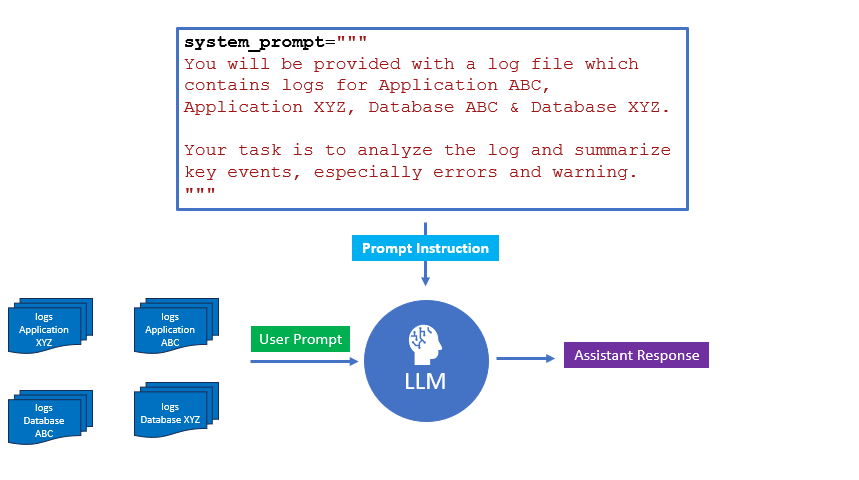

# Prompt Instruction

In [14]:
system_prompt="""
You will be provided with a log file which contains logs for Application ABC,Application XYZ, Database ABC & Database XYZ.
Your task is to analyze the log and summarize the errors.
"""

In [15]:
messages = []
messages.append({"role": "system", "content": system_prompt})
messages.append({"role": "user", "content": log_file_content})

# Calling LLM with log data and Prompt Instruction

In [28]:
response = get_response(messages)
print(response)

BadRequestError: Error code: 400 - {'error': {'message': 'max_tokens is too large: 5000. This model supports at most 4096 completion tokens, whereas you provided 5000.', 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': None}}

# Tuning to get better results

In [24]:
system_prompt="""
You will be provided with a log file which contains logs for Application ABC,Application XYZ, Database ABC & Database XYZ.
Your task is to analyze the log and summarize key events, especially errors and warning.
"""

In [25]:
messages = []
messages.append({"role": "system", "content": system_prompt})
messages.append({"role": "user", "content": log_file_content})

In [26]:
response = get_response(messages)
print(response)

### Summary of Key Events:

#### Application ABC:
- Errors:
  1. Connection failures to Database ABC and Database XYZ.
  2. Data processing failure due to timeout.
  3. Unexpected shutdown detected.
  4. Database XYZ synchronization failure.
  5. Data integrity check failure for Dataset 47.
  6. API response failure from service endpoint.
  7. Error in payment gateway integration.
  8. Performance degradation in module X.
  9. Incompatibility issues with new user data features.
- Warnings:
  1. Response time from Database ABC exceeding 100ms.
  2. Memory usage exceeding 80%.
  3. Unauthorized access attempt detected.
  4. High latency in data transmission.
  5. Outdated software component detected.
  6. Spike in user login attempts.
  7. Elevated error rates in log processing service.

#### Application XYZ:
- Errors:
  1. Connection failures to Database ABC and Database XYZ.
  2. Data processing failure due to timeout.
  3. Service disruption due to network fluctuation.
  4. Failed to 

## Now in the healper function **get_response** lets increase the **max_tokens** to 5K

# 🎯Strategy : Split complex tasks into simpler subtasks
Just as it is good practice in software engineering to decompose a complex system into a set of modular components, the same is true of tasks submitted to a language model. Complex tasks tend to have higher error rates than simpler tasks. Furthermore, complex tasks can often be re-defined as a workflow of simpler tasks in which the outputs of earlier tasks are used to construct the inputs to later tasks.



In [ ]:
instruction_prompt_for_application_ABC = """
Task:
Your task is to analyze log file for application ABC using below instructions.

Instructions:
- Use Report name as : "Health Analysis of Application ABC"
- Capture the time when database connection initiated.
- Capture the time when connection to databases failed.
- Capture how many times database connection was re-tried along with time of retry.
- Highlight if there was any network fluctuation, also capture the time.
- Highlight if response time of database ABC is more than 100ms.
"""

In [ ]:
instruction_prompt_for_application_XYZ = """
Task:
Your task is to analyze log file for application XYZ using below instructions.

Instructions:
- Use Report name as : "Health Analysis of Application XYZ"
- Capture the time when database connection initiated.
- Capture the time when connection to databases failed.
- Capture how many times database connection was re-tried along with time of retry.
- Highlight if there was any network fluctuation, also capture the time.
- Highlight if response time of database XYZ is more than 200ms.
"""

In [ ]:
instruction_prompt_for_database_ABC = """
Task:
Your task is to analyze log file for database ABC using below instructions.

Instructions:
- Use Report name as : "Health Analysis of Database ABC"
- Capture the time when CPU utilization exceeds 90%
- Capture if there is any corruption detected in any index file. Also capture the time.
- Highlight if query execution time is longer than 100ms for application ABC
- Highlight if query execution time is longer than 200ms for application XYZ
"""

In [ ]:
instruction_prompt_for_database_XYZ = """
Task:
Your task is to analyze log file for database XYZ using below instructions.

Instructions:
- Use Report name as : "Health Analysis of Database XYZ"
- Capture the time when CPU utilization exceeds 90%
- Capture if there is any corruption detected in any index file. Also capture the time.
- Capture the details of any patch applied along with time.
- Highlight if query execution time is longer than 100ms for application ABC
- Highlight if query execution time is longer than 200ms for application XYZ
"""

In [ ]:
instruction_prompt_for_final_summary = """
You will be provided with set of system health report analysis.
Task:
Your task is to summarize the analysis.

Instructions:
- Use Report name as : "Summary of Health Analysis"
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": instruction_prompt_for_application_ABC})
messages.append({"role": "user", "content": log_file_for_application_ABC})
analysis_for_application_ABC = get_response(messages)
print(analysis_for_application_ABC)

**Health Analysis of Application ABC**

- Database connection initiated at: [2023-03-02 09:30:15]
- Database connection failed at: [2023-03-02 09:30:20]
- Database connection retried at: 
  1. [2023-03-02 09:31:00]
- Network fluctuation detected at: [2023-03-02 11:00:00]
- Response time of Database ABC exceeded 100ms at: [2023-03-02 09:35:00]


In [ ]:
messages = []
messages.append({"role": "system", "content": instruction_prompt_for_application_XYZ})
messages.append({"role": "user", "content": log_file_for_application_XYZ})
analysis_for_application_XYZ = get_response(messages)
print(analysis_for_application_XYZ)

**Health Analysis of Application XYZ**

- Database Connection Initiated: 2023-03-02 09:30:16
- Database Connection Failure: 2023-03-02 09:30:20
- Database Connection Retry:
  - 1st Retry: 2023-03-02 09:31:00
- Network Fluctuation: 2023-03-02 10:15:00
- Response Time of Database XYZ > 200ms: 2023-03-02 09:35:00

Overall, the application experienced database connection issues, network fluctuation, and high response time from Database ABC. It's important to monitor these aspects closely to ensure the stability and performance of Application XYZ.


In [ ]:
messages = []
messages.append({"role": "system", "content": instruction_prompt_for_database_ABC})
messages.append({"role": "user", "content": log_file_for_database_ABC})
analysis_for_database_ABC = get_response(messages)
print(analysis_for_database_ABC)

Report: Health Analysis of Database ABC

1. Time when CPU utilization exceeds 90%:
- [2023-03-02 09:35:00] ALERT: Database ABC - CPU usage exceeds 90%

2. Corruption detected in index file:
- [2023-03-02 10:50:00] ERROR: Database ABC - Corruption detected in index file for table 'customer_data'

3. Query execution time longer than 100ms for Application ABC:
- [2023-03-02 09:45:00] WARNING: Database ABC - Query execution time longer than 100ms for Application ABC

4. Query execution time longer than 200ms for Application XYZ:
- [2023-03-02 09:45:01] WARNING: Database ABC - Query execution time longer than 200ms for Application XYZ


In [ ]:
messages = []
messages.append({"role": "system", "content": instruction_prompt_for_database_XYZ})
messages.append({"role": "user", "content": log_file_for_database_XYZ})
analysis_for_database_XYZ = get_response(messages)
print(analysis_for_database_XYZ)

**Health Analysis of Database XYZ**

- **CPU Utilization Exceeded 90%:**
  - Time: [2023-03-02 11:00:00]

- **Corruption Detected in Index File:**
  - No index file corruption detected.

- **Patch Applied:**
  - Time: [2023-03-02 11:20:00]
  - Details: Patch applied to mitigate security vulnerability.

- **Query Execution Time Exceeded 100ms for Application ABC:**
  - No instances of query execution time exceeding 100ms for Application ABC.

- **Query Execution Time Exceeded 200ms for Application XYZ:**
  - No instances of query execution time exceeding 200ms for Application XYZ.


In [ ]:
all_analysis=""

In [ ]:
all_analysis = analysis_for_application_ABC + " " + analysis_for_application_XYZ + " " + analysis_for_database_ABC + " " + analysis_for_database_XYZ

In [ ]:
all_analysis

In [ ]:
messages = []
messages.append({"role": "system", "content": instruction_prompt_for_final_summary})
messages.append({"role": "user", "content": all_analysis})
final_summary = get_response(messages)
print(final_summary)

# Putting everything together

In [ ]:
# Dictionary containing log files and their corresponding prompts
log_files = {
    "application_ABC": {
        "chunk": log_file_for_application_ABC,
        "prompt": instruction_prompt_for_application_ABC
    },
    "application_XYZ": {
        "chunk": log_file_for_application_XYZ,
        "prompt": instruction_prompt_for_application_XYZ
    },
    "database_ABC": {
        "chunk": log_file_for_database_ABC,
        "prompt": instruction_prompt_for_database_ABC
    },
    "database_XYZ": {
        "chunk": log_file_for_database_XYZ,
        "prompt": instruction_prompt_for_database_XYZ
    }
}

In [ ]:
results = []

In [ ]:
# Function to process each log with its corresponding prompt using a dictionary
def analyse_log_files(log_files):
    for log_id, details in log_files.items():
        messages = []
        messages.append({"role": "system", "content": details["prompt"]})
        messages.append({"role": "user", "content": details["chunk"]})
        analysis = get_response(messages)
        results.append(analysis)
        print(f"\n Analysis for {log_id}: {analysis}")

In [ ]:
# Create the final Summary report
def create_summary_report(results, summary_prompt):
  analysis_result = ' '.join(results)
  messages = []
  messages.append({"role": "system", "content": summary_prompt})
  messages.append({"role": "user", "content": analysis_result})
  final_summary = get_response(messages)
  print("\n\n",final_summary)

In [ ]:
# Call the function with the dictionary of log files
analyse_log_files(log_files)

In [ ]:
#Call the function to create summary report
create_summary_report(results, instruction_prompt_for_final_summary)

# Important Tips

In [ ]:
!pip install tiktoken

In [ ]:
# Count the number of tokens in the text
def count_tokens(text):
    encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
    text = text
    token_count = len(encoding.encode(text))
    print(f"*******The text contains {token_count} tokens.******")


In [ ]:
count_tokens(log_file_content)

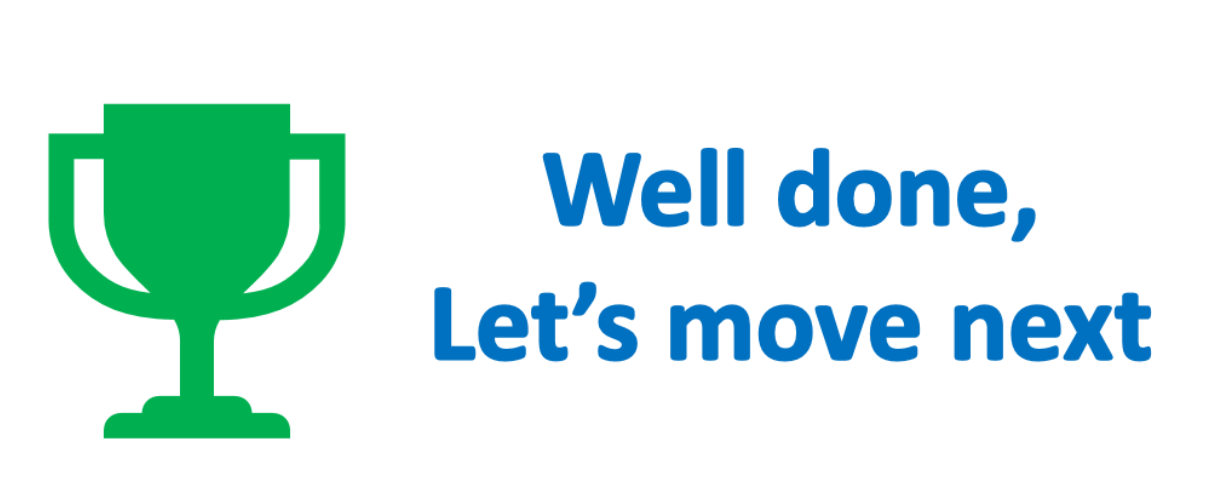